In [1]:
from numpy import linspace, zeros, meshgrid, c_, logspace

from matplotlib.pyplot import subplots, show
from matplotlib.colors import LogNorm

from pandas import read_csv


# Clustering

## The Clustering Problem

If data are not labelled the

[Clustering Methods](https://scikit-learn.org/stable/modules/clustering.html)


![Methods Comparison](ClusterMethods.png)
![Success Comparison](Clustering_comparison.png)



## Weight-Height Data

In [2]:
df = read_csv("../Data/patients_data.csv") 

df.columns


Index(['Age', 'Height', 'Weight', 'Systolic', 'Diastolic', 'Smoker', 'Gender'], dtype='object')

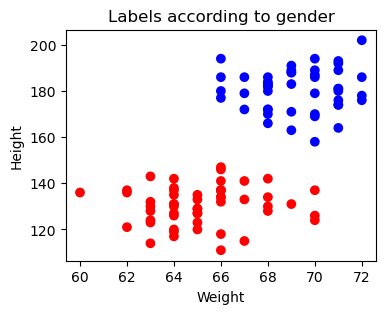

In [3]:
X = df.to_numpy()

X_sub_1 = X[:,1:3]


y_true = zeros(len(X[:,-1]))

y_true[X[:,-1] == 'Female'] = 1


fig, ax = subplots(figsize=(4, 3))

ax.scatter(X_sub_1[:, 0], X_sub_1[:, 1], c=y_true, cmap='bwr');
ax.set_title('Labels according to gender')
ax.set_xlabel('Weight')
ax.set_ylabel('Height');

show()


## GMM Clustering

Optimises the likelihood that the data come from an overlap of (e.g. 2) normal distributions

The method to opimise label distribution is [Expectation maximisation](https://en.wikipedia.org/wiki/Expectation–maximization_algorithm)


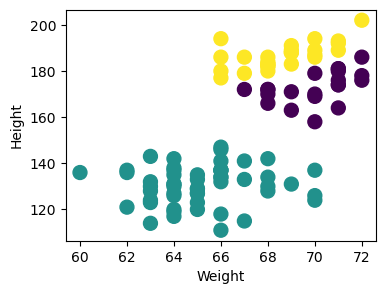

In [5]:
from sklearn.mixture import GaussianMixture

n_components = 3

clu_1 = GaussianMixture(n_components=n_components)

clu_1.fit(X_sub_1)

y_predict_1 = clu_1.predict(X_sub_1)

fig, ax = subplots(figsize=(4, 3))

ax.scatter(X_sub_1[:, 0], X_sub_1[:, 1],  s=100, c=y_predict_1, cmap='viridis');
ax.set_xlabel('Weight')
ax.set_ylabel('Height');

show()


### Log Likelihood

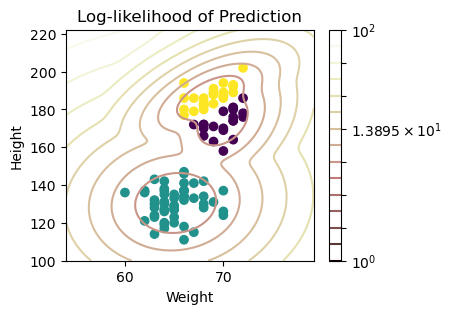

In [11]:
resolution = 100

vec_a = linspace(0.9*min(X_sub_1[:,0]), 1.1*max(X_sub_1[:,0]), resolution)
vec_b = linspace(0.9*min(X_sub_1[:,1]), 1.1*max(X_sub_1[:,1]), resolution)

grid_a, grid_b = meshgrid(vec_a, vec_b)

XY_statespace = c_[grid_a.ravel(), grid_b.ravel()]

Z_score = clu_1.score_samples(XY_statespace)

Z_s = Z_score.reshape(grid_a.shape)


fig, ax = subplots(figsize=(4, 3))

cax = ax.contour(grid_a, grid_b, -Z_s, 
           norm=LogNorm(vmin=1.0, vmax=100.0),
           levels=logspace(0, 2, 15),
           cmap='pink'
          )

fig.colorbar(cax)

ax.scatter(X_sub_1[:, 0], X_sub_1[:, 1],  c=y_predict_1, cmap='viridis')
ax.set_xlabel('Weight')
ax.set_ylabel('Height')

ax.set_title('Log-likelihood of Prediction', fontsize=12)

show()


### Assessment

Similarity measure to compare the overlap of two clusterings

Assessment using extrenal standard done with [rand_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.rand_score.html)


In [19]:
from sklearn.metrics.cluster import adjusted_rand_score

scoring = adjusted_rand_score(y_true, y_predict_1)

print(scoring)


1.0


The scoring indicates perfect labelling according to 'Gender'.

### Systolic-Diastolic Data

In [31]:
df

,Age,Height,Weight,Systolic,Diastolic,Smoker,Gender
0,38,71,176.0,124.0,93.0,1,Male
1,43,69,163.0,109.0,77.0,0,Male
2,38,64,131.0,125.0,83.0,0,Female
3,40,67,133.0,117.0,75.0,0,Female
4,49,64,119.0,122.0,80.0,0,Female
...,...,...,...,...,...,...,...
95,25,69,171.0,128.0,99.0,1,Male
96,44,69,188.0,124.0,92.0,1,Male
97,49,70,186.0,119.0,74.0,0,Male
98,45,68,172.0,136.0,93.0,1,Male


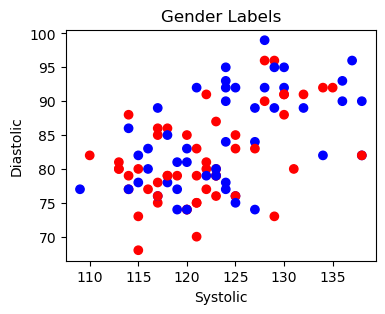

In [12]:
X_sub_2 = X[:,3:5]

fig, ax = subplots(figsize=(4, 3))

ax.scatter(X_sub_2[:, 0], X_sub_2[:, 1], c=y_true, cmap='bwr');
ax.set_xlabel('Systolic')
ax.set_ylabel('Diastolic')
ax.set_title('Gender Labels');

show()


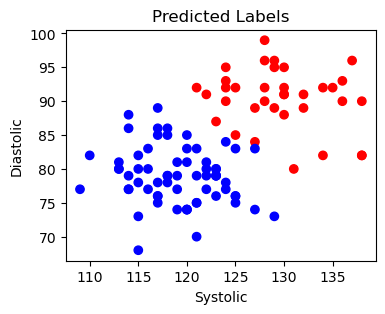

In [13]:
n_components = 2

clu_2 = GaussianMixture(n_components=n_components)

clu_2.fit(X_sub_2)

y_predict_2 = clu_2.predict(X_sub_2)

fig, ax = subplots(figsize=(4, 3))

ax.scatter(X_sub_2[:, 0], X_sub_2[:, 1],  c=y_predict_2, cmap='bwr_r');
ax.set_title('Predicted Labels')
ax.set_xlabel('Systolic')
ax.set_ylabel('Diastolic');

show()


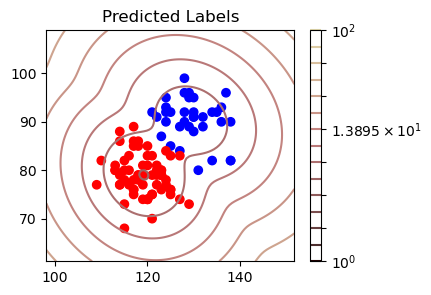

In [17]:
resolution = 100

vec_a = linspace(0.9*min(X_sub_2[:,0]), 1.1*max(X_sub_2[:,0]), resolution)
vec_b = linspace(0.9*min(X_sub_2[:,1]), 1.1*max(X_sub_2[:,1]), resolution)

grid_a, grid_b = meshgrid(vec_a, vec_b)

XY_statespace = c_[grid_a.ravel(), grid_b.ravel()]

Z_score = clu_2.score_samples(XY_statespace)

Z_s = Z_score.reshape(grid_a.shape)


fig, ax = subplots(figsize=(4, 3))

cax = ax.contour(grid_a, grid_b, -Z_s, 
           norm=LogNorm(vmin=1.0, vmax=1000.0),
           levels=logspace(0, 2, 15),
           cmap='pink'
          )

fig.colorbar(cax)

ax.scatter(X_sub_2[:, 0], X_sub_2[:, 1],  c=y_predict_2, cmap='bwr')

ax.set_title('Predicted Labels');

show()


In [20]:
scoring = adjusted_rand_score(y_true, y_predict_2)

print(scoring)


0.030809331315545804


The scoring indicates pure chance.

## Kmeans Clustering

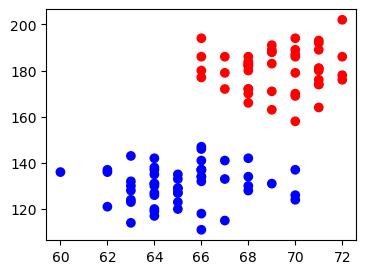

In [21]:
from sklearn.cluster import KMeans

n_components = 2

km_1 = KMeans(n_clusters=n_components)

km_1.fit(X_sub_1)

y_predict_1 = km_1.predict(X_sub_1)

fig, ax = subplots(figsize=(4, 3))

ax.scatter(X_sub_1[:, 0], X_sub_1[:, 1],  c=y_predict_1, cmap='bwr_r');

show()


Demo of problems with Kmeans clustering due to specific data features:

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py


Link to the [paper highlighting pitfalls while clustering](https://www.science.org/doi/abs/10.1126/scisignal.aad1932)

# Application: Ovarian Cancer Data

In [22]:
df = read_csv('../Data/ovarian.txt', header=None)
labels = read_csv('../Data/ovarian_group.txt', header=None)

print(len(df), len(df.columns))

X = df.to_numpy()
y = (labels.to_numpy()).ravel()


216 4000


0.19317411054208736


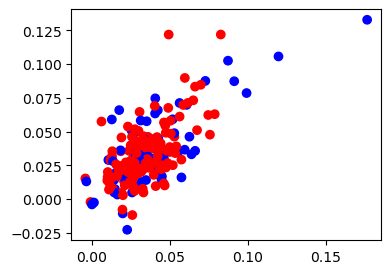

In [23]:
n_components = 2

km_ov = KMeans(n_clusters=n_components)

km_ov.fit(X)

y_predict_ov = km_ov.predict(X)

scoring_ov = adjusted_rand_score(y, y_predict_ov)

print(scoring_ov)

fig, ax = subplots(figsize=(4, 3))

ax.scatter(X[:, 0], X[:, 1],  c=y_predict_ov, cmap='bwr_r');


## Combine with Supervised Learning

In [24]:
from sklearn.model_selection import train_test_split

RANDOM_SEED = 1234

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, 
                                                    random_state=RANDOM_SEED)


In [25]:
from sklearn.ensemble import RandomForestClassifier

RANDOM_SEED = 999

clf = RandomForestClassifier(random_state=RANDOM_SEED)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Evaluating the score using test data:
score = clf.score(X_test, y_test)

print(round(score, 2))


0.91


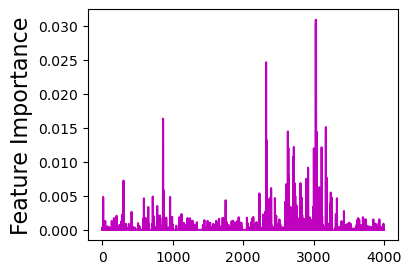

In [26]:
importances = clf.feature_importances_

fig, ax = subplots(figsize=(4, 3))

ax.plot(importances, color=('m'));
ax.set_ylabel('Feature Importance', fontsize=16);


In [27]:
importance_threshold = 0.01

imps_above = importances > importance_threshold

X_reduced = X[:, imps_above]

X_reduced.shape

(216, 16)

0.3367962517486878


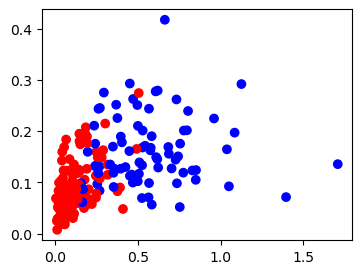

In [28]:
n_components = 2

km = KMeans(n_clusters=n_components)

km.fit(X_reduced)

y_predict = km.predict(X_reduced)

from sklearn.metrics.cluster import adjusted_rand_score

scoring = adjusted_rand_score(y, y_predict)

print(scoring)

fig, ax = subplots(figsize=(4, 3))

ax.scatter(X_reduced[:, 0], X_reduced[:, 1],  c=y_predict, cmap='bwr_r');


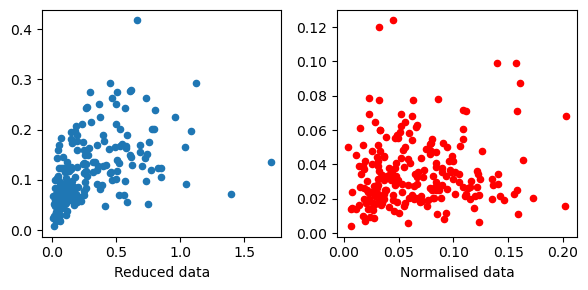

In [34]:
from sklearn.preprocessing import Normalizer 

norm_skl = Normalizer()

X_normed = norm_skl.fit_transform(X_reduced)

fig, ax = subplots(nrows=1, ncols=2, figsize=(6, 3))

ax[0].scatter(X_reduced[:, 0], X_reduced[:, 1], s=20)
ax[0].set_xlabel('Reduced data')

ax[1].scatter(X_normed[:, 0], X_normed[:, 1], s=20, c='r')
ax[1].set_xlabel('Normalised data');

fig.tight_layout()

0.466540138034273


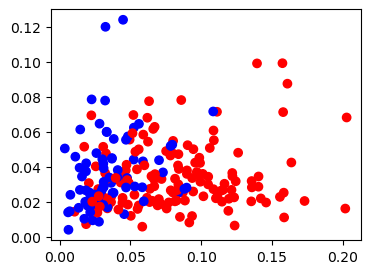

In [35]:
km = KMeans(n_clusters=n_components)

km.fit(X_normed)

y_predict_km = km.predict(X_normed)

scoring = adjusted_rand_score(y, y_predict_km)

print(scoring)

fig, ax = subplots(figsize=(4, 3))

ax.scatter(X_normed[:, 0], X_normed[:, 1],  c=y_predict_km, cmap='bwr_r');


0.4793554571602187


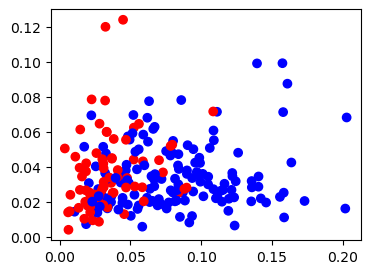

In [36]:
from sklearn.mixture import GaussianMixture

gauss = GaussianMixture(n_components=n_components)

gauss.fit(X_normed)

y_predict_gauss = gauss.predict(X_normed)

scoring_gauss = adjusted_rand_score(y, y_predict_gauss)

print(scoring_gauss)

fig, ax = subplots(figsize=(4, 3))

ax.scatter(X_normed[:, 0], X_normed[:, 1],  c=y_predict_gauss, cmap='bwr');


In [37]:
adjusted_rand_score(y_predict_km, y_predict_gauss)

0.9813234461288995

# Conclusion

Clustering is an unsupervised way of dividing samples in a dataframe such that they fall into distinct categories. There are many ways of defining what constitutes a "distinct" category, normally some distance measure is used to define whether two points belong together or nor. 

Unsupervised methods from scikit-learn are easy to use but results need critical quality testing. In addition to within-data assessments, this requires domain expertise, additional knowledge about the nature of the data. 